# Practical Lab: Week 6

Note: This practical session is based on the exercises in chapter 4, section 4.7.2 and Applied 13.

First, let's install the packages that we will use in this lab

For these exercises we use the numpy library in version 1.22, which is compatible with the ISLP library.

In [ ]:
# !pip install --force-reinstall -v "numpy==1.22"
!pip install ISLP

If you are working with Google Colab, after running this cell, restart the terminal.

In [2]:
#imports das bibliotecas
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from ISLP import load_data
from ISLP import confusion_table

## Part 1

In this part of the lab we will work with the Smarket dataframe. (https://islp.readthedocs.io/en/latest/datasets/Smarket.html)

In [3]:
#load do Smarket via ISLP
Smarket = load_data('Smarket')
Smarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1250 non-null   int64   
 1   Lag1       1250 non-null   float64 
 2   Lag2       1250 non-null   float64 
 3   Lag3       1250 non-null   float64 
 4   Lag4       1250 non-null   float64 
 5   Lag5       1250 non-null   float64 
 6   Volume     1250 non-null   float64 
 7   Today      1250 non-null   float64 
 8   Direction  1250 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 79.6 KB


1 - Compute the correlation matrix using the `corr()` method for data `Smarket`. Which pair of variables have substantial correlation? Why `direction` not appear?

In [9]:
Smarket.corr()

ValueError: could not convert string to float: 'Up'

In [8]:
#imprimir a tabela de correlação do dataframe
Smarket.loc[:, Smarket.columns != 'Direction'].corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


2 - Fit a logistic regression model in order to predict Direction using Lag1 through Lag5 and Volume.

In [10]:
#exibir o head dos dados para saber se é necessário alguma modificação
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [12]:
#necessário converter a coluna Direction em bool
Smarket['Direction'] = pd.get_dummies(Smarket['Direction'], drop_first=True, dtype='int')

In [13]:
#dataset com a nova coluna
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


In [14]:
#motagem da regressao através do input da formula
mod = smf.logit(formula='Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=Smarket)
res = mod.fit()
#imprimindo os valores
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                0.002074
Time:                        20:30:46   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

3 - Use the `pvalues` attribute to access the p-values for the coefficients (not shown).

In [ ]:
#para acessar os valores p de uma regressao basta usar a funçao pvalues junto a variavel do modelo
res.pvalues

Intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

4 - Use `predict()` method to predict the probability that the market will go up, given values of the predictors.

In [ ]:
#agora que temos um modelo vamos prever os valores de y para todos os datapoints
probs = res.predict()
probs [:10]
#portanto o retorno desse predict() é um vetor de probabilidades que precisam ser convertidas agora em labels

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

5 - Create a array with "Up" and "Down" for all probabilities calculated before. Consider  prob > 0.5 "Up"

In [ ]:
#uma forma pythonica de fazer isso é usando o np.array
#primeiro cria-se um array com todos os valores down
labels = np.array(['Down']*len(Smarket))
#depois converte somente aqueles que tem probs >5 para Up
labels[probs>0.5] = "Up"
labels

array(['Up', 'Down', 'Down', ..., 'Up', 'Up', 'Up'], dtype='<U4')

6 - The `confusion_table()` function from the ISLP package summarizes these predictions, showing how many observations were correctly or incorrectly classified. Compare using `confusion_table` the labels of predictions and the column Direction from dataset. The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonals represent incorrect predictions.

In [ ]:
#para fazer a matriz de confusao precisamos fazer load nos labels originais
Smarket = load_data('Smarket')

In [ ]:
#agora vamos comparar o valor previsto com o valor original
print(confusion_table(labels, Smarket.Direction))

Truth      Down   Up
Predicted           
Down        145  141
Up          457  507


In [ ]:
#taxa de acerto
print((507+145)/1250)

#OR

#pythonic
print(np.mean(labels == Smarket.Direction))

0.5216
0.5216


## Part 2

This part of lab should be answered using the Weekly data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from previous lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.
(https://islp.readthedocs.io/en/latest/datasets/Weekly.html)

In [ ]:
#load do dataset Weekly
Weekly = load_data('Weekly')
Weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


1 - Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [ ]:
#print da tabela de correlação do dataset
Weekly.corr()

/var/folders/dk/tgx2lhxj52s1l1spxdf3r2mh0000gn/T/ipykernel_26596/467502964.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Weekly.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


In [ ]:
#head dos dados
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [ ]:
#pela analise da tabela de correlação podemos observar que year tem uma relação forte com volume

<Axes: >

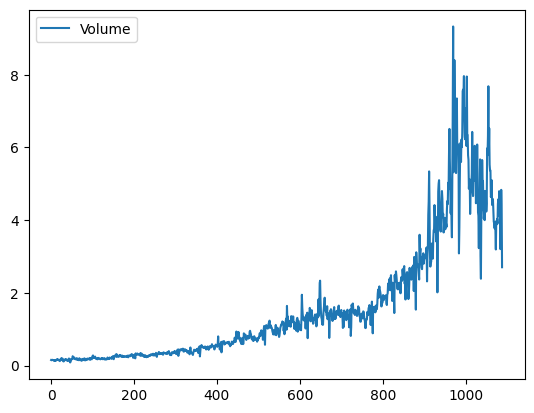

In [ ]:
#assumindo que os dados do datase estão ordenados por ano
#fazemos o plot de Volume
Weekly.plot(y='Volume')

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Volume', ylabel='Year'>],
       [<Axes: xlabel='Year', ylabel='Volume'>,
        <Axes: xlabel='Volume', ylabel='Volume'>]], dtype=object)

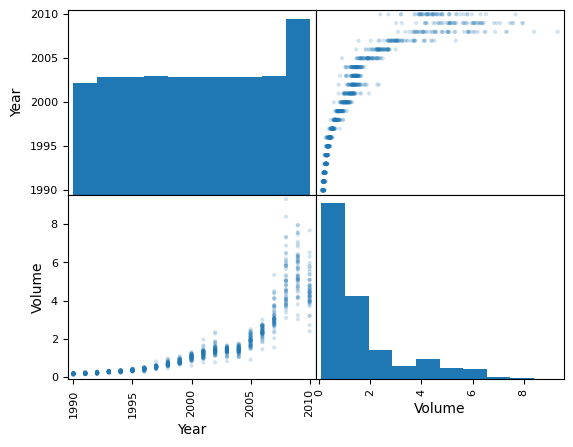

In [ ]:
#também podemos fazer um scatter matrix entre as duas variaveis para perceber melhor a relação
pd.plotting.scatter_matrix(Weekly[['Year','Volume']], alpha=0.2)

2 - Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [ ]:
#head dos dados para auxiliar na montagem do modelo
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [ ]:
#conversão da coluna Direction em dummies
Weekly['Direction'] = pd.get_dummies(Weekly['Direction'], drop_first=True)

In [ ]:
#novo head dos dados
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [ ]:
#cria-se o modelo a partir da equação
mod = smf.logit(formula='Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=Weekly)
res = mod.fit()

#print da tabela
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                0.006580
Time:                        13:54:45   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

In [ ]:
#portando analisando a tabela acima somente lag2 tem um p valor dentro do intervalo de confiança

3 - Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [ ]:
#agora vamos gerar o vetor de probabilidades do modelo
probs = res.predict()

#criar também o velot de labels
labels = np.array(['Down']*len(Weekly))
labels[probs>0.5] = "Up"


#load dos dados originais
Weekly = load_data('Weekly')
#riar a matrix de confusão
print(confusion_table(labels, Weekly.Direction))

print()

#media dos da contagem dos valores de label iguais a Weekly.Direction
print(np.mean(labels == Weekly.Direction))

Truth      Down   Up
Predicted           
Down         54   48
Up          430  557

0.5610651974288338


4 - Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [ ]:
#vamos agora criar os datasets de treino
#primeiro faz-se load do dataset original
Weekly = load_data('Weekly')
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [ ]:
#faz um filtro conforme as datas do enunciado
new_Weekly = Weekly[(Weekly['Year']>=1990) & (Weekly['Year']<=2008)]

In [ ]:
#converter a coluna direction para bool
new_Weekly['Direction'] = pd.get_dummies(new_Weekly['Direction'], drop_first=True)

/var/folders/dk/tgx2lhxj52s1l1spxdf3r2mh0000gn/T/ipykernel_26596/3682354555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Weekly['Direction'] = pd.get_dummies(new_Weekly['Direction'], drop_first=True)


In [ ]:
#dados modificados
new_Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [ ]:
#cria-se o modelo
mod = smf.logit(formula='Direction ~ Lag2', data=new_Weekly)
res = mod.fit()

#print da tabela
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                0.003076
Time:                        13:58:05   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [ ]:
#criando agora dos dados de teste
out_Weekly = Weekly[Weekly['Year']>2008]

In [ ]:
#usar o modelo criado a partir dos dados de treino para prever as labels nos dados de teste
probs = res.predict(out_Weekly)
#labels criadas
labels = np.array(['Down']*len(out_Weekly))
labels[probs>0.5] = "Up"



#load das labels originais e filtro
Weekly = load_data('Weekly')
out_Weekly = Weekly[Weekly['Year']>2008]

#agora matriz de confusão final
print(confusion_table(labels, out_Weekly.Direction))

print()

print(np.mean(labels == out_Weekly.Direction))

Truth      Down  Up
Predicted          
Down          9   5
Up           34  56

0.625
